# Universidad Internacional de la Rioja en México - UNIR
## Asignatura: Percepción Computacional  

### Información de los Alumnos
#### Ariel Bonifacio Mejía  
#### Carlos Dubón
#### Junior Feliz Gervacio Burgos
#### Jack Edwards Zenozain

### Fecha de Presentación  
#### **13 de Febrero de 2025**

### Actividad #3 - Actividad Grupal



## Evaluación de la Segmentación
### 1. Objetivos

El objetivo de este trabajo es aprender a construir y evaluar el rendimiento de uno o más segmentadores. Esta actividad permitirá consolidar los conceptos sobre segmentación de imágenes aprendidos.

## 2.1 Técnica Tradicional

#### a. Breve Descripción de la técnica de segmentación tradicional seleccionada
**El algoritmo de Watershed**: es una técnica de segmentación de imágenes basada en la topografía de la imagen interpretada como una superficie tridimensional, donde la intensidad de los píxeles representa la altura. Este algoritmo es particularmente útil para segmentar objetos que están conectados o solapados.

A continuación mostramos el Pipeline utilizado:
- Carga la imagen y se convierte a escala de grises.
- Aplica binarización con Otsu y operaciones morfológicas para limpiar ruido.
    - Apertura
    - Dilatación
- Obtiene el fondo seguro y el primer plano seguro con transformada de distancia.
- Aplica Watershed para segmentar los objetos.
- Asignan colores aleatorios y se dibujan los objetos detectados.
- Aplica transparencia para mejorar la visualización y resaltar los objetos detectados.
- Calcula las métricas para evaluar el desempeńo basado en el Ground Truth.

#### b. A continuación el código de las funciones con implementado
##### lista de las funciones:
- **mostrarImagen**: se utiliza para mostrar las imágenes.
- **calculateJaccardScore**: calcula la métrica para evaluar el desempeño basado en el Ground Truth.
- **obtenerArchivoMascara**: busca el archivo que contiene la máscara de ground truth correspondiente a la imagen seleccionada.
- **segmentarObjectosWaterShed**: segmenta los objetos que estan en la imagen usando el algoritmo de WaterShed y el pipeline anteriormente indicado.
- **ejecutarSegmentacion**: carga los Widgets de Jupyter Notebook para hacer la corrida de forma interactiva y lograr facilidad para jugar con el cambio de los parámetros de la funcion y ver sus efectos en los resultados.


### Código correspondiente documentado:

In [1]:
#!pip install ipywidgets

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import random
from sklearn.metrics import jaccard_score
import os
import time

import ipywidgets as widgets
from IPython.display import display

In [2]:
def mostrarImagen(titulos = None, imagenes = None, tamanoPulg = 10):
    """
    Esta funcion tiene el objetivo de mostrar o visualizar una o varias imágenes:
    Parametros:
        title: título o lista de titulos a mostrar en caso que sea una lista de imagenes.
        imagenes: es la imagen a visualizar, o una lista de imagenes a visualizar una al lado de la otra.
        tamanoPulg: es el tamaño de visualización de la imagen en pulgadas, solo se especifica la altura (height), 
    """
    
    if isinstance(imagenes, list):
        imagenList = imagenes
    else:
        imagenList = [imagenes]

    if isinstance(titulos, list):
        tituloList = titulos
    else:
        tituloList = [titulos]
        
    # extraemos la altura y el ancho de la iamgen de la primera imagen de la lista
    h, w = imagenList[0].shape[0], imagenList[0].shape[1]
    # calculamos las propociones de la misma
    aspect_ratio = h / w
    # creamos la figura con las dimensiones o tamaños especificados
    plt.figure(figsize=(tamanoPulg * aspect_ratio, tamanoPulg))

    cols = len(imagenList)
    # iteramos por cada imagen a mostrar
    for i, image in enumerate(imagenList):
        plt.subplot(1, cols, i+1)
        # carga la imagen convertida de BGR a RGB
        plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
        # se le pone el titulo
        plt.title(tituloList[i], fontsize=10)
        plt.axis("off")
        
    plt.tight_layout()
    # se muestra la imagen o imagenes
    plt.show()

In [3]:
def calculateJaccardScore(segmentedImage, groundTruthImage, mostrarLog = True):
    """
    Calcula la similitud entre dos conjuntos y determina el porcentaje de similitud entre 
    la imgen segmentada y su ground truth.

    Parametros:
    segmentedImage: la imagen segmentada.
    groundTruthImage: la imagen ground truth de la imagen original.
    
    """
    # Cargar las imágenes binarizadas (0: fondo, 1: objeto)
    #ground_truth = cv2.imread("ground_truth.png", 0)
    #segmentation = cv2.imread("segmentation.png", 0)
    #print(segmentedImage)
    ground_truth = cv.cvtColor(groundTruthImage, cv.COLOR_BGR2GRAY)
    segmentation = cv.cvtColor(segmentedImage, cv.COLOR_BGR2GRAY)
    #mostrarImagen(["Img. Segmentada", "Ground Truth"], [segmentation, ground_truth])

    # Convertir a binario (0 y 1)
    #_, gt_bin = cv.threshold(ground_truth, 127, 1, cv.THRESH_BINARY)
    #_, seg_bin = cv.threshold(segmentation, 127, 1, cv.THRESH_BINARY)
    _, gt_bin = cv.threshold(ground_truth, 10, 255, cv.THRESH_BINARY)
    _, seg_bin = cv.threshold(segmentation, 10, 255, cv.THRESH_BINARY)

    mostrarImagen(["Img. Segmentada", "Ground Truth"], [seg_bin, gt_bin])
    gt_bin = (gt_bin / 255).astype(np.uint8)
    seg_bin = (seg_bin / 255).astype(np.uint8)


    
    # Calcular Jaccard Score (IoU)
    iou_score = jaccard_score(gt_bin.flatten(), seg_bin.flatten())
    if mostrarLog:
        print(f"Jaccard Score (IoU): {iou_score*100:.4f}")
    return iou_score


In [4]:
def obtenerArchivoMascara(image_path):
    """
    Dada la ruta de una imagen, devuelve la ruta esperada de su máscara ground truth en la carpeta de etiquetas.
    
    Parametros:
        image_path (str): Ruta de la imagen original, por ejemplo 'imagen/imagen1.jpg'.
    
    Returns:
        str: Ruta esperada de la máscara ground truth, por ejemplo 'imagen/imagen1_mascaras/label.png'.
    """
    
    # Obtener el directorio y el nombre del archivo sin extensión
    dir_name, file_name = os.path.split(image_path)
    base_name, _ = os.path.splitext(file_name)

    # Construir la nueva ruta de la máscara
    mask_folder = os.path.join(dir_name, f"{base_name}_mascaras")
    mask_path = os.path.join(mask_folder, "label.png")

    return mask_path

In [5]:

def segmentarObjectosWaterShed(imagen = None, 
                               thresholdTransformMask = 0.7, 
                               distanceTransformMask = 5, 
                               cantidadObjetos = 0,
                               calcularMetrica = True,
                               mostrarLog = True,
                               tamanoKernel = 3,
                               cantIteracionesApertura = 2,
                               cantIteracionesDilatacion = 3,
                               cantIteracionesCerradura = 0,
                               cantIteracionesErosion = 0):
    """
    Esta función tiene como objetivo segmentar objetos en una imagen usando el método WaterShed:
    Parametros:
        imagen: la imagen a la cual se va a segmentar los objetos.
        thresholdTransformMask: Aplica un umbral del 70% del valor máximo de la transformada de distancia.
        distanceTransformMask: tamaño de la máscara utilizada para el cálculo la transformada de distancia de la imagen.
        cantidaObjetos: indica la cantidad de objetos que contiene la imagen, para comparar con la cantidad segmentada.
        calcularMetrica: indica si se va a calcular la métrica basada en el Ground Truth.
        mostrarLog: indica si se muestra el detalle del pipeline que se va realizando paso a paso.
        cantIteracionesApertura: indica la cantidad de veces que se aplica la operación morfolófica Apertura, por defecto se aplican 2 veces.
        cantIteracionesDilatacion: indica la cantidad de veces que se aplica la operación morfolófica Dilatación, por defecto se aplican 3 veces.
    """

    img = cv.imread(imagen)

    if img is None:
        print("Error: No se pudo cargar la imagen. Verifica la ruta.")
        return

    # se muestra la imagen original
    mostrarImagen("imagen original", img)

    # se hace una copia
    original = img.copy()
    
    # Convierte a escala de grises
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    if mostrarLog:
        mostrarImagen("imagen escala de grises", gray)

    # Realiza la binarización
    ret, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
    if mostrarLog:
        mostrarImagen("Imagen binarizada", thresh)

    # Operaciones morfológicas
    kernel = np.ones((tamanoKernel, tamanoKernel), np.uint8)
    if cantIteracionesApertura > 0:
        operacion_morfologica = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel, iterations=cantIteracionesApertura)

    if cantIteracionesCerradura > 0:
        operacion_morfologica = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel, iterations=cantIteracionesCerradura)
    
    if mostrarLog:
        mostrarImagen("Apertura", operacion_morfologica)


    sure_bg = cv.dilate(operacion_morfologica, kernel, iterations=cantIteracionesDilatacion)

    if mostrarLog:
        mostrarImagen("Fondo Seguro", sure_bg)

    # Transformada de distancia (utilizamos distancia Euclideana)para obtener áreas seguras (fondo seguro, primer plano seguro, etc)
    dist_transform = cv.distanceTransform(operacion_morfologica, cv.DIST_L2, distanceTransformMask)
    dist_transform_normalized = cv.normalize(dist_transform, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)
    
    ret, sure_fg = cv.threshold(dist_transform, thresholdTransformMask * dist_transform.max(), 255, 0)
    sure_fg = np.uint8(sure_fg)
    if mostrarLog:
        mostrarImagen("Transformada de Distancia", dist_transform_normalized)
        mostrarImagen("Primer Plano Seguro", sure_fg)

    # Región desconocida
    unknown = cv.subtract(sure_bg, sure_fg)
    if mostrarLog:
        mostrarImagen("Región Desconocida", unknown)

    # Encuentra los componentes conectados y Etiquetado de marcadores
    ret, markers = cv.connectedComponents(sure_fg)
    if mostrarLog:
        print("lista de marcadores",np.unique(markers))
        print("cantidad de etiquetas",ret)

    markers = markers + 1
    markers[unknown == 255] = 0

    # Aplicar Watershed (segmenta la imagen en diferentes regiones basándose en los marcadores iniciales)
    markers2 = cv.watershed(img, markers)
    img[markers2 == -1] = [255,0,0]
    #mostrarImagen("Watershed",img)

    
    # creando imagen segmentada donde los componentes segmentados se visualizan en diferentes colores
    label_hue = np.uint8(179*markers2/np.max(markers2))
    #if mostrarLog:
        #mostrarImagen('Componentes finales', label_hue)
    
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv.merge([label_hue, blank_ch, blank_ch])
    labeled_img = cv.cvtColor(labeled_img, cv.COLOR_HSV2BGR)
    labeled_img[label_hue==0] = 0

    # Aplicar umbralización binaria
    #_, binary_hue = cv.threshold(label_hue, 50, 255, cv.THRESH_BINARY)
    #mostrarImagen("binary_hue", binary_hue)

    if mostrarLog:
        mostrarImagen('Componentes finales', labeled_img)


    # Generar colores aleatorios para cada objeto
    num_objetos = np.max(markers2)
    colores = {i: (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)) for i in range(2, num_objetos + 1)}

    # Crear una imagen en blanco para el relleno
    overlay = original.copy()

    # Convertimos los markers a imagen binaria para obtener contornos de los objetos
    objetos_binarios = np.uint8(markers2 > 1) * 255  
    contornos, _ = cv.findContours(objetos_binarios, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    listaObjectosRecortados = []

    resultadoBlackWhite = 0*np.ones_like(img)

    # Dibujar cada objeto con su color de relleno y borde
    for i, contorno in enumerate(contornos):
        color = colores.get(i + 2, (255, 255, 255))  # Asignar color aleatorio
        cv.drawContours(overlay, [contorno], -1, color, -1)  # Dibujar relleno
        cv.drawContours(resultadoBlackWhite, [contorno], -1, (255, 255, 255), -1)  # Dibujar relleno Blanco sobre fondo negro
        cv.drawContours(original, [contorno], -1, (0, 255, 0), 7)  # Dibujar borde verde

        # Recortando los objetos
        x, y, w, h = cv.boundingRect(contorno)
        objeto_recortado = original[y:y+h, x:x+w]
        listaObjectosRecortados.append(objeto_recortado)

    
    #mostrarImagen("resultadoBlackWhite", resultadoBlackWhite)
    
    # Aplicar transparencia al relleno
    alpha = 0.5  # Ajusta la transparencia (0: invisible, 1: sólido)
    resultado = cv.addWeighted(overlay, alpha, original, 1 - alpha, 0)

    # Si pasan la cantidad de objetos que esta en la imagen entonces 
    # lo comparamos con la cantidad de objetos encontrados para usarlo como métrica
    #if cantidadObjetos>0:
        #print(F'ha detactado {len(listaObjectosRecortados)} de {cantidadObjetos} aproximado {len(listaObjectosRecortados)/cantidadObjetos*100}%')

    # Calculamos las métricas basadas en el ground truth de la imagen
    if calcularMetrica:
        imgGroundTruthPath = obtenerArchivoMascara(imagen)
        imgGroundTruth = cv.imread(imgGroundTruthPath)
        #mostrarImagen(["resultadoBlackWhite", "Ground Truth"], [resultadoBlackWhite, imgGroundTruth])
        score = calculateJaccardScore(resultadoBlackWhite, imgGroundTruth, False)
        
    
    return resultado, listaObjectosRecortados, score


In [6]:
def ejecutarSegmentacion():
    """
    Esta función se encarga de crear los Widgets para hacer la ejeución mas interactiva, para poder ejecutar el proceso con varios 
    parámtros y facilitar la experimentación de los algoritmos.
    """

    # Lista de las imágenes para probar el proceso
    listaImagenes = ['Seleccione la imagen',
                     'Imagenes/large-set-of-different-summer-objects-on-white-background-free-vector.jpg',
                     'Imagenes/vector-various-objects.jpg',
                     'Imagenes/imagen.jpg',
                     'Imagenes/tomas-directas-de-varios-objetos-sobre-la-mesa-EYF01650.jpg',
                     'Imagenes/istockphoto-1269270433-1024x1024.jpg',
                     'Imagenes/Objetos-perdidos-Policia-Local.jpg'
                    ]
    # Lista con la cantidad de objetos que ante mano se sabe contiene cada imagen, esto para usarlo como métrica en la funcion principal.
    listaImagenesCantidadObjetos = [0, 25, 6, 1, 15, 11, 5]
    
    # Lista de mascaras para el calculo de la distancia.
    options_list = [0, 3, 5]    

    # Crear widgets
    imagenes_dropdown =  widgets.Dropdown(
        options=listaImagenes,
        value=listaImagenes[0],  # Valor inicial
        description='Imagen:'
    )

    
    thresholdTransformMask_slider = widgets.FloatSlider(min=0.1, max=1, step=0.1, value=0.7, description='Umbral')
    
    cantIteracionesApertura_slider = widgets.FloatSlider(min=0, max=5, step=1, value=2, description='Iter. Apertura')
    
    cantIteracionesDilatacion_slider = widgets.FloatSlider(min=0, max=5, step=1, value=3, description='Iter. Dilatación')
    
    cantIteracionesCerradura_slider = widgets.FloatSlider(min=0, max=5, step=1, value=0, description='Iter. Cerradura')
    
    cantIteracionesErosion_slider = widgets.FloatSlider(min=0, max=5, step=1, value=0, description='Iter. Erosion')
    
    tamanoKernel_slider = widgets.FloatSlider(min=3, max=15, step=2, value=3, description='Kernel Morf')
    
    distanceTransformMask_dropDown = widgets.Dropdown(
        options=options_list,
        value=options_list[2],  # Valor inicial
        description='Mascara Dista:'
    )
    
    mostrarLog_checkBox = widgets.Checkbox(value=True, description="Mostrar log")
    
    
    btn = widgets.Button(description="Ejecutar")
    
    # Output para mostrar los resultados.
    output = widgets.Output()
    
    # Función que se ejecutará cuando cambie la selección de la imagen y mostrar la imagen seleccionada.
    def on_change(change):
        with output:
            output.clear_output(wait=True)  # Limpia la salida anterior
            if change['type'] == 'change' and change['name'] == 'value':
                myimg = cv.imread(imagenes_dropdown.value)
                mostrarImagen('Imagen Seleccionada', myimg)
    
    # Función para ejecutar el proceso.
    def ejecutar_segmentacion(b):
        with output:
            output.clear_output(wait=True)  # Limpia la salida anterior
            if imagenes_dropdown.value == 'Seleccione la imagen':
                print('Debe seleccionar una imagen...')
                return
            
            cantidadObjetos = listaImagenesCantidadObjetos[listaImagenes.index(imagenes_dropdown.value)]
            # Ejecución de la función principal que hace la segmentación
            imgResultado, listaObjetos, score = segmentarObjectosWaterShed(imagen = imagenes_dropdown.value, 
                                          thresholdTransformMask = thresholdTransformMask_slider.value, 
                                          distanceTransformMask = distanceTransformMask_dropDown.value,
                                          cantidadObjetos = cantidadObjetos,
                                          mostrarLog = mostrarLog_checkBox.value,
                                          tamanoKernel = int(tamanoKernel_slider.value),
                                          cantIteracionesApertura = int(cantIteracionesApertura_slider.value),
                                          cantIteracionesDilatacion = int(cantIteracionesDilatacion_slider.value),
                                          cantIteracionesCerradura = int(cantIteracionesCerradura_slider.value),
                                          cantIteracionesErosion = int(cantIteracionesErosion_slider.value))
            
            mostrarImagen("Imagen con Objetos Detectados con Relleno Semi-Transparente", imgResultado)

             # Crear etiquetas para los objetos detectados.
            listaObjectosLabel = []
            for i in range(0, len(listaObjetos)):
                listaObjectosLabel.append(f'Objecto #{i+1}')
    
            mostrarImagen(listaObjectosLabel, listaObjetos)
            
            print(' ')
            print(f'Lista de objetos segmentados: ({len(listaObjetos)})')
            print(' ')
            # Si pasan la cantidad de objetos que esta en la imagen entonces 
            # lo comparamos con la cantidad de objetos encontrados para usarlo como métrica
            if cantidadObjetos>0:
                print(F'ha detactado {len(listaObjetos)} de {cantidadObjetos} aproximado {len(listaObjetos)/cantidadObjetos*100}%')
            print(' ')
            print(f'Métrica basada en Ground Truth, Jaccard Score: {score*100:.4f}%')

    # Evento click del botón ejecutar
    btn.on_click(ejecutar_segmentacion)
    
    # Vincular el evento de cambio al Dropdown
    imagenes_dropdown.observe(on_change, names='value')
    
    # Mostrar widgets
    display(imagenes_dropdown, 
            thresholdTransformMask_slider, 
            mostrarLog_checkBox, 
            tamanoKernel_slider,
            distanceTransformMask_dropDown, 
            cantIteracionesApertura_slider,
            cantIteracionesDilatacion_slider,
            cantIteracionesCerradura_slider,
            cantIteracionesErosion_slider,
            btn, 
            output)

In [7]:
# Ejecución de todo el proceso de forma interactiva.
ejecutarSegmentacion()

Dropdown(description='Imagen:', options=('Seleccione la imagen', 'Imagenes/large-set-of-different-summer-objec…

FloatSlider(value=0.7, description='Umbral', max=1.0, min=0.1)

Checkbox(value=True, description='Mostrar log')

FloatSlider(value=3.0, description='Kernel Morf', max=15.0, min=3.0, step=2.0)

Dropdown(description='Mascara Dista:', index=2, options=(0, 3, 5), value=5)

FloatSlider(value=2.0, description='Iter. Apertura', max=5.0, step=1.0)

FloatSlider(value=3.0, description='Iter. Dilatación', max=5.0, step=1.0)

FloatSlider(value=0.0, description='Iter. Cerradura', max=5.0, step=1.0)

FloatSlider(value=0.0, description='Iter. Erosion', max=5.0, step=1.0)

Button(description='Ejecutar', style=ButtonStyle())

Output()

### Conclusiones

El algoritmo Watershed es una técnica efectiva para la segmentación de imágenes, pero su rendimiento se ve afectado en imágenes con muchos objetos, bordes débiles u objetos con areas en su interior coincidente con el color de fondo, donde puede no detectar objetos de forma correcta o causar sobresegmentación y volverse computacionalmente costoso. Por esta razones hay que emplear un proceso de preprocesamiento adecuado, como operaciones morfológicas y técnicas de detección de bordes, las cuales pueden dependender del contenido de la imagen.

Uno de los principales desafíos en el uso de Watershed es la evaluación de su precisión, ya que requiere la creación de un Ground Truth manual para comparar los resultados obtenidos con la segmentación real esperada. Este proceso es laborioso y costoso, especialmente cuando se trabaja con imágenes complejas o de gran tamaño. Además, ajustar los parámetros del algoritmo para mejorar la segmentación puede ser un proceso iterativo y dependiente de la situación, lo que hace que su implementación práctica sea más demandante.

Si bien Watershed sigue siendo útil en ciertos casos, en imágenes muy complejas puede ser más eficiente emplear métodos basados en Deep Learning, los cuales pueden aprender a segmentar sin necesidad de ajustar manualmente cada imagen.

En conclusión, Watershed no debe descartarse por completo, pero su uso debe evaluarse según la complejidad de la imagen y los requerimientos de la aplicación. Además, es importante considerar el costo de generar Ground Truth y la dificultad de ajustar manualmente el algoritmo, lo que puede hacer que otras técnicas sean más prácticas dependiendo del caso de uso.


## 1.2 Técnica por Deep Learning

#### Breve Descripción de la técnica de segmentación con Deep Learning seleccionada
**Modelo Resnet**: ResNet, o Residual Network, es una arquitectura de red neuronal profunda desarrollada por Kaiming He y su equipo en 2015. ResNet fue diseñada para superar las limitaciones de las redes neuronales convolucionales (CNN) tradicionales, especialmente el problema de la degradación de precisión que ocurre cuando se añaden más capas a una red. 

Para el desarrollo de la actividad, se ha procedido a utilizar las versiones de ResNet50 y ResNet101, comparando los resultados entre ellos para validar su uso y resultados. Para esta ejecución se crearon tres funciones, la primera, segment_image, que es la que ejecuta la predicción de las capas, recibe la imagen y el tipo de modelo a usar, y las otras dos son solo para el manejo de la generación y presentación de la imagen. 



### Código correspondiente documentado:

In [10]:
# Importar librerias a usar
import torch # type: ignore
import torchvision.transforms as T # type: ignore
from PIL import Image # type: ignore
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore
import time
from skimage.measure import label
from skimage.color import label2rgb
import psutil

In [11]:
# Dispositivo: usar GPU si está disponible, sino CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Cargar los modelos preentrenado DeepLabv3
model_resnet50 = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet50', pretrained=True).to(device).eval()
model_resnet101 = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet101', pretrained=True).to(device).eval()

Using cache found in C:\Users\celta/.cache\torch\hub\pytorch_vision_v0.10.0
c:\Users\celta\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\celta\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Using cache found in C:\Users\celta/.cache\torch\hub\pytorch_vision_v0.10.0
c:\Users\celta\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments

In [16]:
# Transformaciones para preprocesar la imagen
preprocess = T.Compose([
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
def create_cityscapes_colormap():
    """Creates a Cityscapes-like colormap."""
    colormap = np.zeros((256, 3), dtype=np.uint8)
    colormap[0] = [128, 64, 128]  # Carretera
    colormap[1] = [244, 35, 232]  # Acera
    colormap[2] = [70, 70, 70]    # Edificio
    colormap[3] = [102, 102, 156] # Muro
    colormap[4] = [190, 153, 153] # Baranda
    colormap[5] = [153, 153, 153] # Poste
    colormap[6] = [250, 170, 30]  # Semáforo
    colormap[7] = [220, 220, 0]   # Señal de tráfico
    colormap[8] = [107, 142, 35]  # Vegetación
    colormap[9] = [152, 251, 152] # Terreno
    colormap[10] = [70, 130, 180] # Cielo
    colormap[11] = [220, 20, 60]  # Persona
    colormap[12] = [255, 0, 0]    # Coche
    colormap[13] = [0, 0, 142]    # Moto
    colormap[14] = [0, 0, 70]     # Bicicleta
    colormap[15] = [0, 60, 100]   # Autobús
    colormap[16] = [0, 80, 100]   # Tren
    colormap[17] = [0, 0, 230]    # Camión
    colormap[18] = [119, 11, 32]   # Otros
    colormap[19] = [0, 0, 0]      # Sin etiqueta
    return colormap

colormap = create_cityscapes_colormap()

In [17]:
# Definicion de funciones generales

def segment_image(input_image, resnet_option="resnet101"):
    '''
    La funcion se utiliza para generar la segmentacion de la imagen, el usuario puede determinar
    la version de resnet a utilizar.

    Parametros:
    input_image     Imagen en formato RGB
    resnet_option   Version de resnet a utilizar, puede ser resnet101 o resnet50, por defecto
                    se utiliza resnet101.
    '''

     # Inicializar medidor de tiempo y uso de memoria y CPU
    start_time = time.time() 
    initial_memory = psutil.virtual_memory().used
    initial_cpu = psutil.cpu_percent(interval=None)

    # Utilizar los modelos cargados globalmente
    if resnet_option.lower() == "resnet50":
        model = model_resnet50  # Usar el modelo ResNet50 cargado globalmente
        print("\nUsando ResNet50")
    elif resnet_option.lower() == "resnet101":
        model = model_resnet101  # Usar el modelo ResNet101 cargado globalmente
        print("\nUsando ResNet101")
    else:
        raise ValueError("Opción de ResNet no válida. Debe ser 'resnet50' o 'resnet101'.")

    model.to(device)  # Se mueve el modelo al dispositivo (GPU o CPU)
    model.eval()  # Se pone el modelo en modo de evaluación (no se calcularán gradientes)

    # Ajustar tamaño de la imagen (divisible por 32|pueden funcionar de manera más eficiente)
    w, h = input_image.size  # Se obtienen el ancho y alto de la imagen
    new_w = (w // 32) * 32  # Se calcula el nuevo ancho divisible por 32
    new_h = (h // 32) * 32  # Se calcula el nuevo alto divisible por 32
    input_image = input_image.resize((new_w, new_h))  # Se redimensiona la imagen

    # Prepara la imagen para que sea compatible con el modelo preentrenado
    input_tensor = preprocess(input_image).unsqueeze(0).to(device)  # Se preprocesa la imagen y se convierte a tensor

    with torch.no_grad():  # Se desactiva el cálculo de gradientes
        output = model(input_tensor)['out'][0]  # Se realiza la inferencia con el modelo
        output_predictions = output.argmax(0).cpu().numpy()  # Se obtienen las predicciones y se convierten a NumPy

    segmented_image = Image.fromarray(colormap[output_predictions.astype(np.uint8)]).resize(input_image.size, Image.NEAREST) # Se crea la imagen segmentada

    end_time = time.time()  # Se mide el tiempo de fin de la función
    final_memory = psutil.virtual_memory().used
    final_cpu = psutil.cpu_percent(interval=None)

    labels = label(output_predictions)  # Se etiquetan las regiones conectadas
    num_objects = labels.max()  # Se calcula el número de objetos

    # Calcular el uso total de memoria y CPU
    memory_used = final_memory - initial_memory
    cpu_used = final_cpu - initial_cpu
    
    print(f"Se identificaron {num_objects} objetos.")
    print(f"Tiempo total de ejecución: {end_time - start_time:.2f} segundos")
    print(f"Memoria utilizada: {memory_used / (1024 ** 2):.2f} MB")
    print(f"Uso de CPU: {cpu_used:.2f} %")

    return segmented_image, input_image, output_predictions  # Se devuelven la imagen segmentada, la imagen original y las predicciones


def process_and_segment_image(input_image):
    original_image = input_image.copy()  # Guardar una copia

    segmented_data = {} # Diccionario para guardar las imagenes y los output_predictions

    for resnet_option in ["resnet50", "resnet101"]:
        segmented_image, _, output_predictions = segment_image(input_image, resnet_option)  # Desempacar los tres valores
        segmented_data[resnet_option] = {"image": segmented_image, "predictions": output_predictions} # Guardar imagen y predicciones

    return original_image, segmented_data

def show_images(image_path):
    input_image = Image.open(image_path).convert('RGB')
    original_image, segmented_data = process_and_segment_image(input_image)

    # Mostrar y guardar las imágenes (original y segmentada)
    plt.figure(figsize=(20, 10))

    plt.subplot(1, 3, 1)
    plt.imshow(original_image)
    plt.title("Imagen Original")
    plt.axis('off')

    # ResNet50 con instancias
    plt.subplot(1, 3, 2)
    labels_resnet50 = label(segmented_data["resnet50"]["predictions"])
    num_instancias_resnet50 = labels_resnet50.max()
    cmap_resnet50 = plt.colormaps.get_cmap('tab20')
    colors_resnet50 = [cmap_resnet50(i / num_instancias_resnet50) for i in range(num_instancias_resnet50 + 1)]

    # Redimensionar la imagen original al tamaño de las etiquetas
    h, w = segmented_data["resnet50"]["predictions"].shape[:2]  # Obtener alto y ancho de las etiquetas
    original_image_np = np.array(original_image.resize((w, h))) # Redimensionar la imagen original

    plt.imshow(label2rgb(labels_resnet50, image=original_image_np, colors=colors_resnet50))
    plt.title(f"ResNet50 ({num_instancias_resnet50} instancias)")
    plt.axis('off')

    # ResNet101 con instancias (corrección similar)
    plt.subplot(1, 3, 3)
    labels_resnet101 = label(segmented_data["resnet101"]["predictions"])
    num_instancias_resnet101 = labels_resnet101.max()
    cmap_resnet101 = plt.colormaps.get_cmap('tab20')
    colors_resnet101 = [cmap_resnet101(i / num_instancias_resnet101) for i in range(num_instancias_resnet101 + 1)]

    # Redimensionar la imagen original al tamaño de las etiquetas
    h, w = segmented_data["resnet101"]["predictions"].shape[:2]
    original_image_np = np.array(original_image.resize((w, h)))

    plt.imshow(label2rgb(labels_resnet101, image=original_image_np, colors=colors_resnet101))
    plt.title(f"ResNet101 ({num_instancias_resnet101} instancias)")
    plt.axis('off')

    plt.show()



Usando ResNet50
Se identificaron 1 objetos.
Tiempo total de ejecución: 2.31 segundos
Memoria utilizada: 40.94 MB
Uso de CPU: 62.00 %

Usando ResNet101
Se identificaron 1 objetos.
Tiempo total de ejecución: 2.34 segundos
Memoria utilizada: 19.94 MB
Uso de CPU: 22.40 %


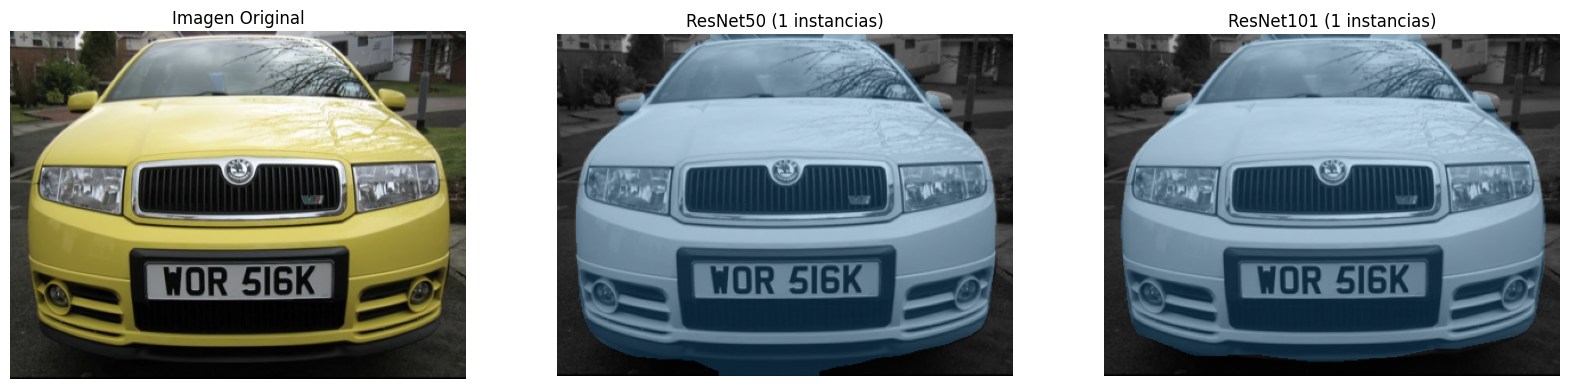


Usando ResNet50
Se identificaron 2 objetos.
Tiempo total de ejecución: 2.94 segundos
Memoria utilizada: 52.00 MB
Uso de CPU: 37.20 %

Usando ResNet101
Se identificaron 4 objetos.
Tiempo total de ejecución: 3.93 segundos
Memoria utilizada: -0.35 MB
Uso de CPU: -11.10 %


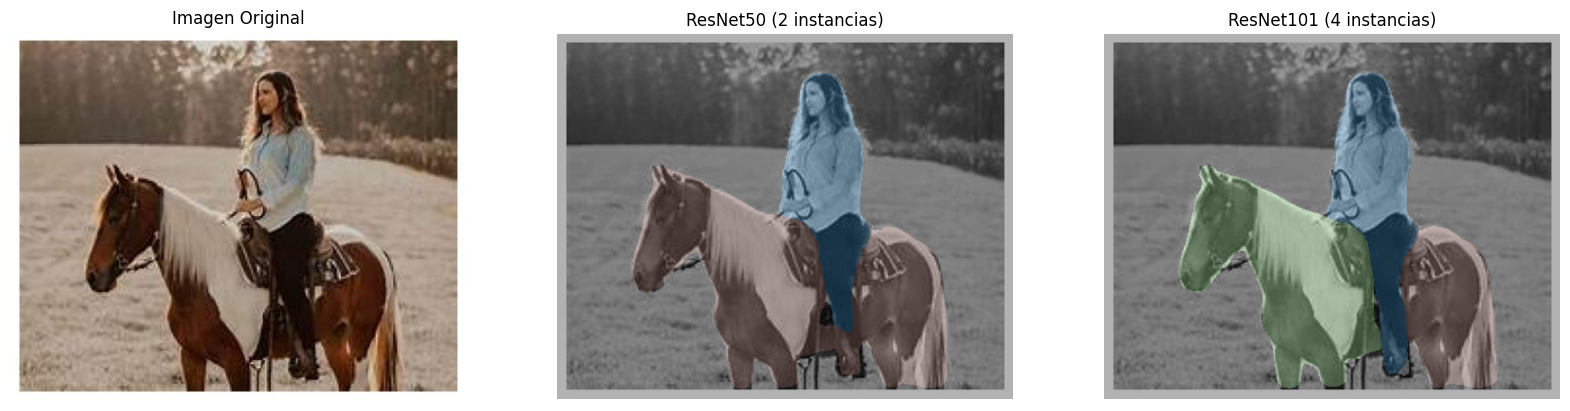


Usando ResNet50
Se identificaron 9 objetos.
Tiempo total de ejecución: 34.39 segundos
Memoria utilizada: -575.56 MB
Uso de CPU: 35.20 %

Usando ResNet101
Se identificaron 7 objetos.
Tiempo total de ejecución: 43.45 segundos
Memoria utilizada: 650.76 MB
Uso de CPU: 12.70 %


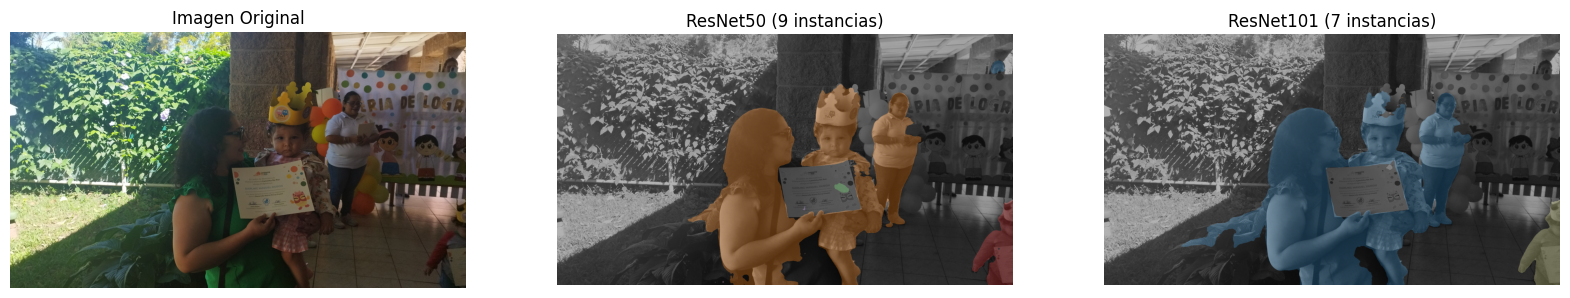


Usando ResNet50
Se identificaron 0 objetos.
Tiempo total de ejecución: 4.55 segundos
Memoria utilizada: 86.56 MB
Uso de CPU: 34.30 %

Usando ResNet101
Se identificaron 0 objetos.
Tiempo total de ejecución: 5.98 segundos
Memoria utilizada: 31.93 MB
Uso de CPU: 73.80 %


C:\Users\celta\AppData\Local\Temp\ipykernel_20952\1141291549.py:94: RuntimeWarning: invalid value encountered in scalar divide
  colors_resnet50 = [cmap_resnet50(i / num_instancias_resnet50) for i in range(num_instancias_resnet50 + 1)]
C:\Users\celta\AppData\Local\Temp\ipykernel_20952\1141291549.py:109: RuntimeWarning: invalid value encountered in scalar divide
  colors_resnet101 = [cmap_resnet101(i / num_instancias_resnet101) for i in range(num_instancias_resnet101 + 1)]


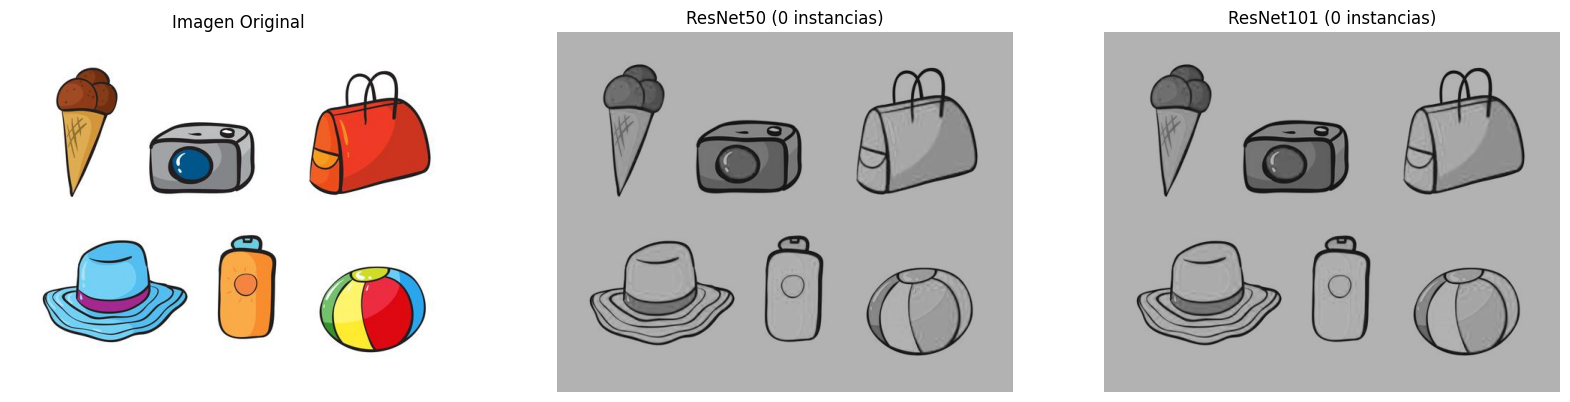

In [20]:
show_images("02.png")
show_images("c.jpeg")
show_images("Test03.png")
show_images("Test07.jpg")   

## Interpretación de los Resultados:
1. Identificación de Objetos:
    - En muchos casos, ResNet50 identificó más objetos en comparación con ResNet101. Esto sugiere que ResNet50 es más eficiente en detectar objetos en este caso específico.

2. Tiempo de Ejecución:
    - En general, ResNet50 es más rápido, que ResNet101. Esto podría deberse a que ResNet101 tiene una arquitectura más profunda y compleja, lo que puede llevar a tiempos de procesamiento más largos.

3. Memoria Utilizada:
    - En promedio, ResNet50 utilizó menos memoria en comparación con ResNet101. Esto también puede atribuirse a la menor complejidad de la arquitectura de ResNet50.

4. Uso de CPU:
    - ResNet50 utiliza más CPU que ResNet101. Esto puede indicar que ResNet50 realiza más operaciones de cómputo intensivas, lo que también podría estar relacionado con su menor tiempo de ejecución.

### Conclusión:
- ResNet50 parece ser más eficiente en términos de velocidad y uso de memoria en este caso específico, pero a costa de un mayor uso de la CPU.
- ResNet101 es más conservador en el uso de la CPU, pero toma más tiempo y usa más memoria, lo que es consistente con su arquitectura más compleja.
- Los modelos ResNet y otras CNNs están diseñados para trabajar con imágenes rasterizadas (fotografías). Esto se puede confirmar al ver que no detecta ningun objeto en las imagenes que vienen de un vector, solo en fotografias

## Bibliografia
- PyTorch. (2019, junio 1). PyTorch Vision ResNet. https://pytorch.org/hub/pytorch_vision_resnet/
- Ultralytics. (2024, septiembre 27). Redes Residuales (ResNet). https://www.ultralytics.com/es/glossary/residual-networks-resnet